In [3]:
#cnn model to predict handwritten digits ( MNIST )
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
844/844 [==============================] - 16s 17ms/step - loss: 0.1992 - accuracy: 0.9398 - val_loss: 0.0689 - val_accuracy: 0.9795
Epoch 2/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 15s 17ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 14s 17ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0340 - accuracy: 0.9894
Test Accuracy: 0.9894


1/1 [==============================] - 0s 93ms/step


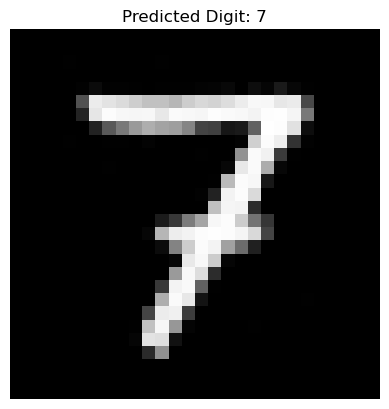

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = img_array.reshape(1, 28, 28, 1) / 255.0  # Normalize
    return img_array

# Predict the digit
img_path = 'Digit_7.png'  # Use your actual path
processed_img = preprocess_image(img_path)

# Predict
pred = model.predict(processed_img)
predicted_digit = np.argmax(pred)

# Show image and prediction
plt.imshow(processed_img[0, :, :, 0], cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [5]:
!git init 

Initialized empty Git repository in C:/Users/HP/Machine Learning & Data Science/.git/
